## SRM INSTITUTE OF SCIENCE AND TECHNOLOGY

### 20PAIE51J- MACHINE LEARNING (UNSUPERVISED MODEL)

#### Hiearchial Clustering

### a. Import required Library (2 marks)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# For supressing all sorts of warnings
import warnings
warnings.filterwarnings("ignore")

### b. Read the dataset (tab, csv, xls, txt, inbuilt dataset). (1 mark)

In [2]:
df = pd.read_csv(r"C:\Users\priya\SRM PYTHON\ML-unsupervised\MP1\MPA-1_forestfires.csv")
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
# pip install --user --upgrade pandas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


### c. Perform explanatory data analysis on the dataset. (3 marks)

In [5]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
# to check missing values
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [7]:
# to check outlier spread
num_c = df.select_dtypes(include=np.number).columns.tolist()
print("Number of numeric var:" ,len(num_c))
print(num_c)

Number of numeric var: 11
['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


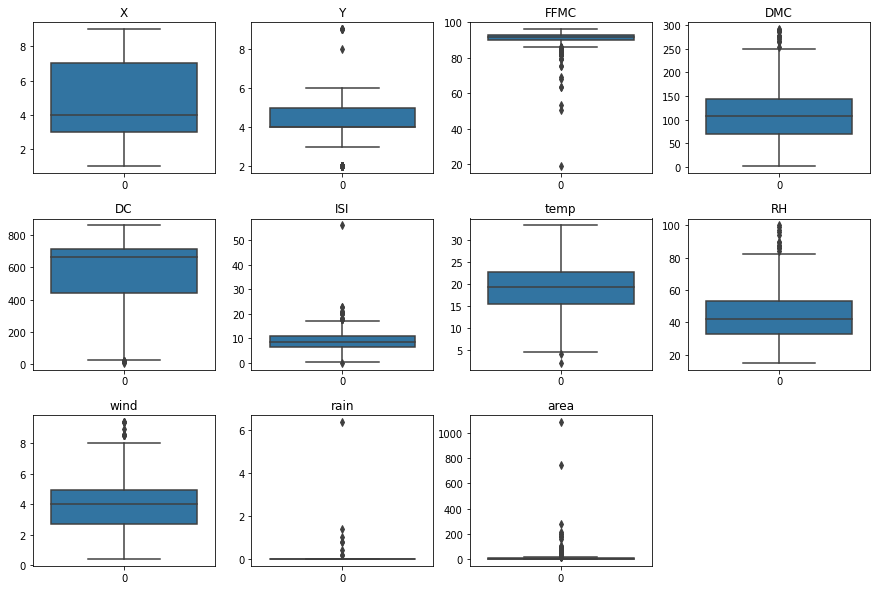

In [8]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
for i in range(0,len(num_c)):
    plt.subplot(3,4,i+1)
    sns.boxplot(df[num_c[i]])
    plt.title(num_c[i])

### d. Plot the datapoints using Scatter Plot. (3 marks)

In [9]:
df1=df.copy()
df1['month_num']=df1['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                                      [1,2,3,4,5,6,7,8,9,10,11,12])

In [10]:
df1.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3


<AxesSubplot:>

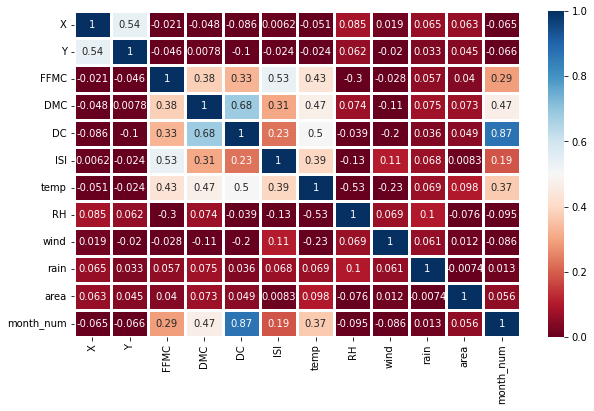

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(),annot = True,linewidths=3,cmap='RdBu',vmin=0,vmax=1)

FFMC (Fine Fuel Moisture Code),
DMC (Duff Moisture Code),
DC (Drought Code), 
ISI (Initial Spread Index)

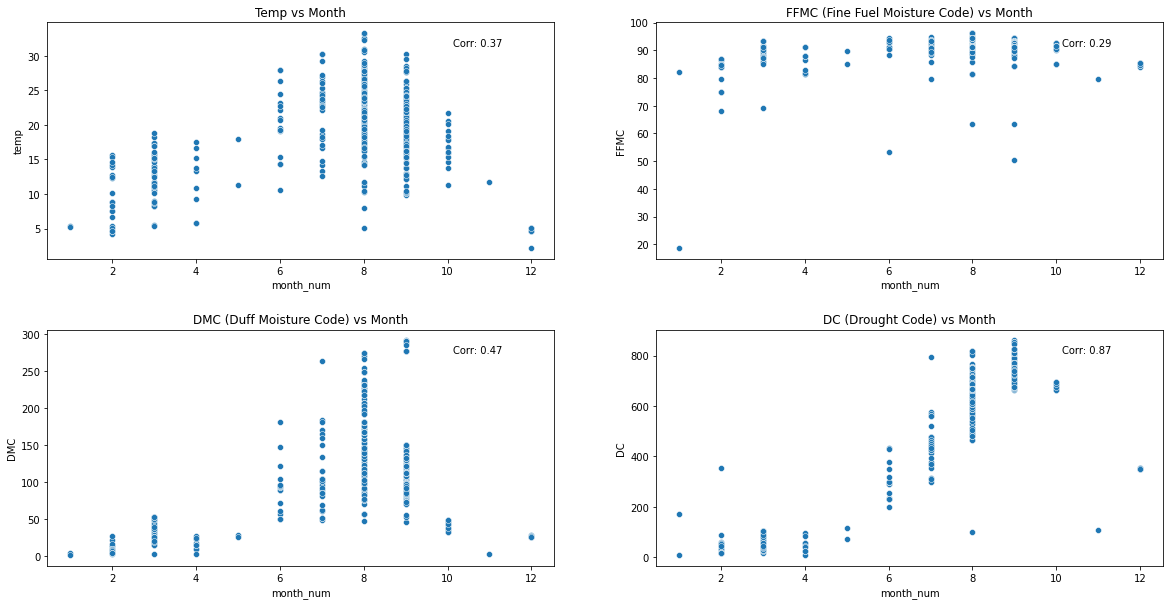

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

sns.scatterplot(x=df1['month_num'], y=df1['temp'],legend='auto', ax=axes[0][0])
axes[0, 0].set_title('Temp vs Month')
corr2 = np.corrcoef(df1['month_num'],df1['temp'])[0, 1]
axes[0, 0].annotate(f'Corr: {corr2:.2f}', xy=(0.8, 0.9), xycoords='axes fraction')

sns.scatterplot(x=df1['month_num'], y=df1['FFMC'],legend='auto', ax=axes[0][1])
axes[0, 1].set_title('FFMC (Fine Fuel Moisture Code) vs Month')
corr3 = np.corrcoef(df1['month_num'],df1['FFMC'])[0, 1]
axes[0, 1].annotate(f'Corr: {corr3:.2f}', xy=(0.8, 0.9), xycoords='axes fraction')

sns.scatterplot(x=df1['month_num'],y=df1['DMC'],legend='auto', ax=axes[1][0])
axes[1, 0].set_title('DMC (Duff Moisture Code) vs Month')
corr1 = np.corrcoef(df1['month_num'], df1['DMC'])[0, 1]
axes[1, 0].annotate(f'Corr: {corr1:.2f}', xy=(0.8, 0.9), xycoords='axes fraction')

sns.scatterplot(x=df1['month_num'],y=df1['DC'],legend='auto', ax=axes[1][1])
plt.title('DC (Drought Code) vs Month')
corr4 = np.corrcoef(df1['month_num'],df1['DC'])[0, 1]
axes[1, 1].annotate(f'Corr: {corr4:.2f}', xy=(0.8, 0.9), xycoords='axes fraction')
plt.show()

### e. Apply five methods of agglomerative hierachial clustering. [Single, complete, average, centroid and ward's linkage method] (2 marks)

In [13]:
df1.drop(columns=['month','day'],inplace= True)
df1.head(3)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10


In [14]:
# to standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)
df_scaled

array([[ 1.00831277,  0.56986043, -0.80595947, ..., -0.07326831,
        -0.20201979, -1.96844301],
       [ 1.00831277, -0.24400101, -0.00810203, ..., -0.07326831,
        -0.20201979,  1.1101202 ],
       [ 1.00831277, -0.24400101, -0.00810203, ..., -0.07326831,
        -0.20201979,  1.1101202 ],
       ...,
       [ 1.00831277, -0.24400101, -1.64008316, ..., -0.07326831,
        -0.02653216,  0.23053071],
       [-1.58736044, -0.24400101,  0.68095666, ..., -0.07326831,
        -0.20201979,  0.23053071],
       [ 0.57570057, -1.05786246, -2.02087875, ..., -0.07326831,
        -0.20201979,  1.54991494]])

### Single linkage method

In [15]:
from sklearn.cluster import AgglomerativeClustering

# creating a copy from original dataframe
df_single = df1.copy()

single = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='single')
s_label = single.fit_predict(df_scaled)
df_single['labels'] = s_label
df_single.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,labels
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,1
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,1
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,1
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,1
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,1


### Complete linkage method

In [16]:
# creating a copy from original dataframe
df_complete = df1.copy()

complete = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='complete')
c_label = complete.fit_predict(df_scaled)
df_complete['labels'] = c_label
df_complete.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,labels
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,0


### Average linkage method

In [17]:
# creating a copy from original dataframe
df_avg = df1.copy()

average = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')
a_label = average.fit_predict(df_scaled)
df_avg['labels'] = a_label
df_avg.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,labels
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,0


### Ward's linkage method

In [18]:
# creating a copy from original dataframe
df_ward = df1.copy()

ward = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='ward')
w_label = ward.fit_predict(df_scaled)
df_ward['labels'] = w_label
df_ward.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,labels
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,1
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,1
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,0


### f. Draw dendrogram for the above five clustering methods. (2 marks)

### Single

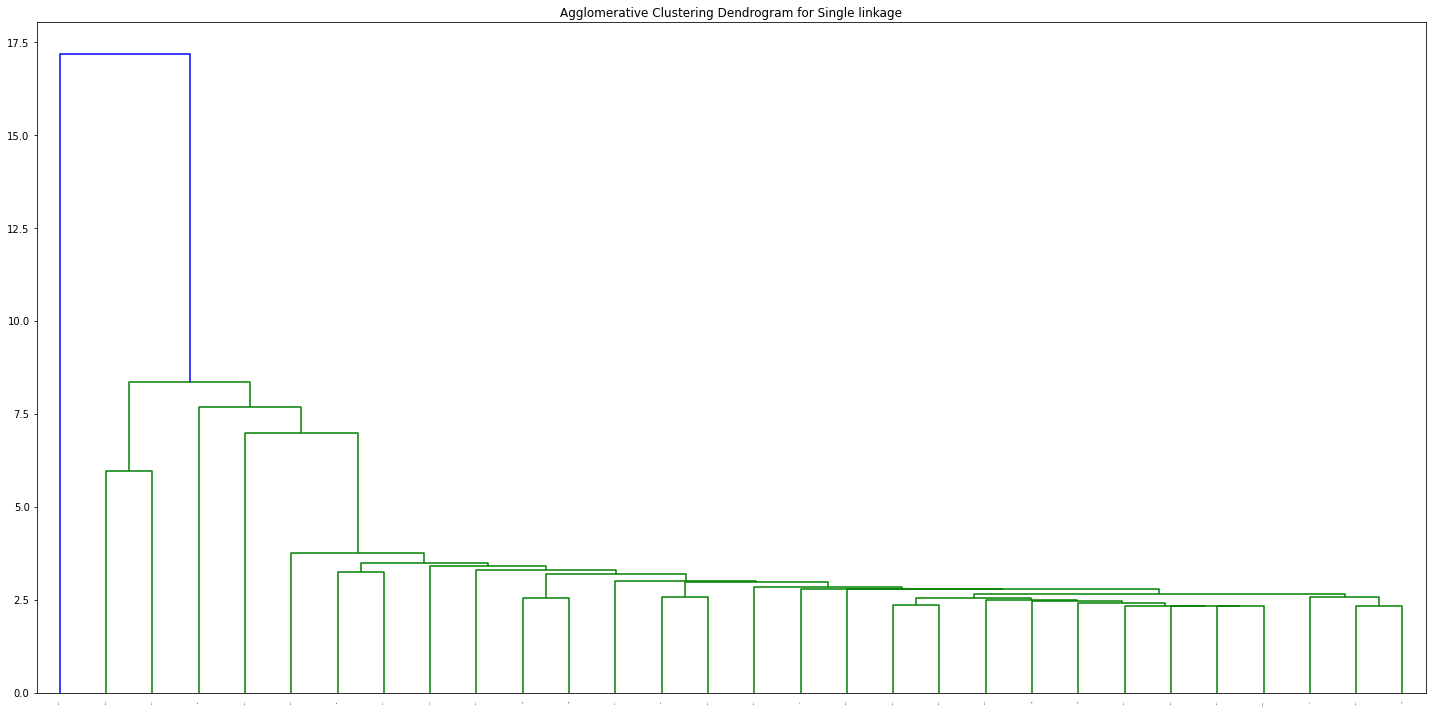

In [19]:
l_single = linkage(df_scaled,'single')
plt.figure(figsize=(20,10))
plt.title('Agglomerative Clustering Dendrogram for Single linkage')
dendrogram(l_single,leaf_rotation=90.,color_threshold = 12, leaf_font_size=2,truncate_mode='lastp')
plt.tight_layout()

### Complete

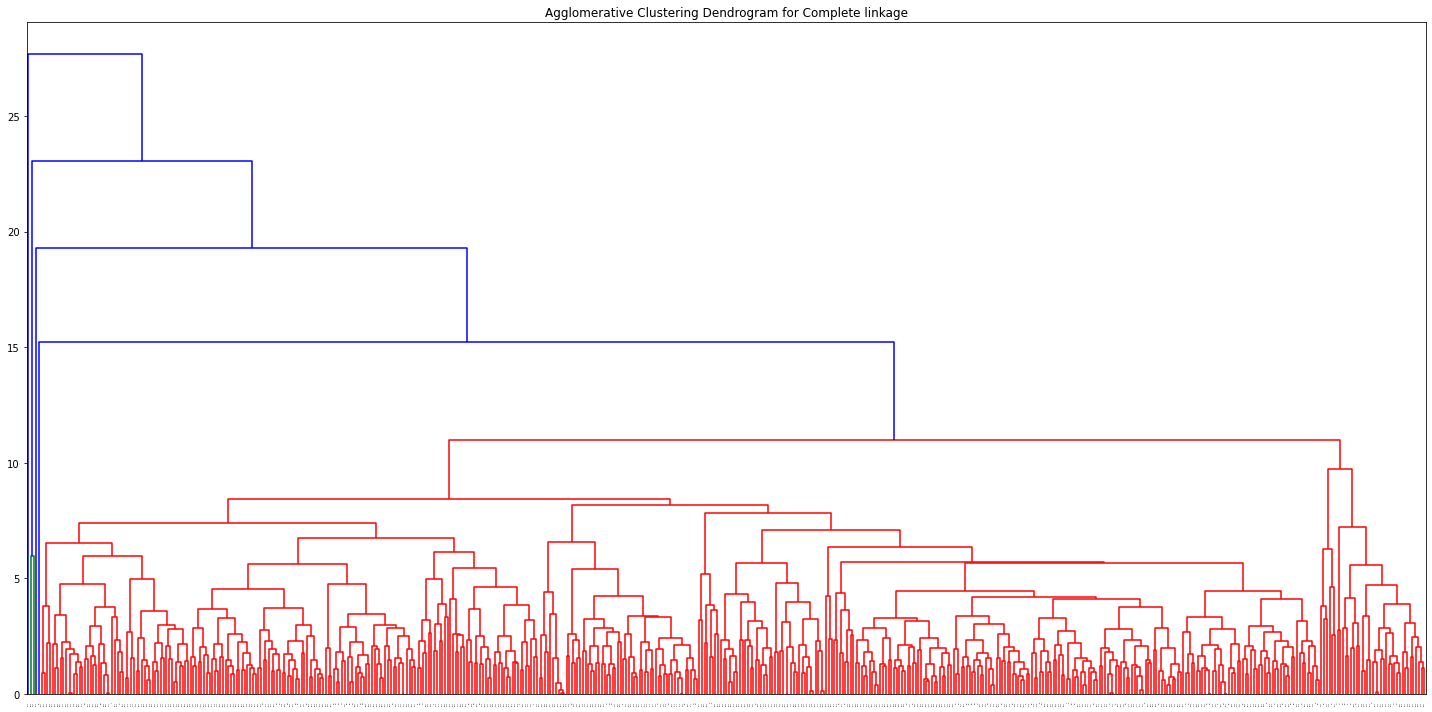

In [40]:
l_comp = linkage(df_scaled,'complete')
plt.figure(figsize=(20,10))
plt.title('Agglomerative Clustering Dendrogram for Complete linkage')
dendrogram(l_comp,leaf_rotation=90.,color_threshold = 12, leaf_font_size=2)
plt.tight_layout()

### Average

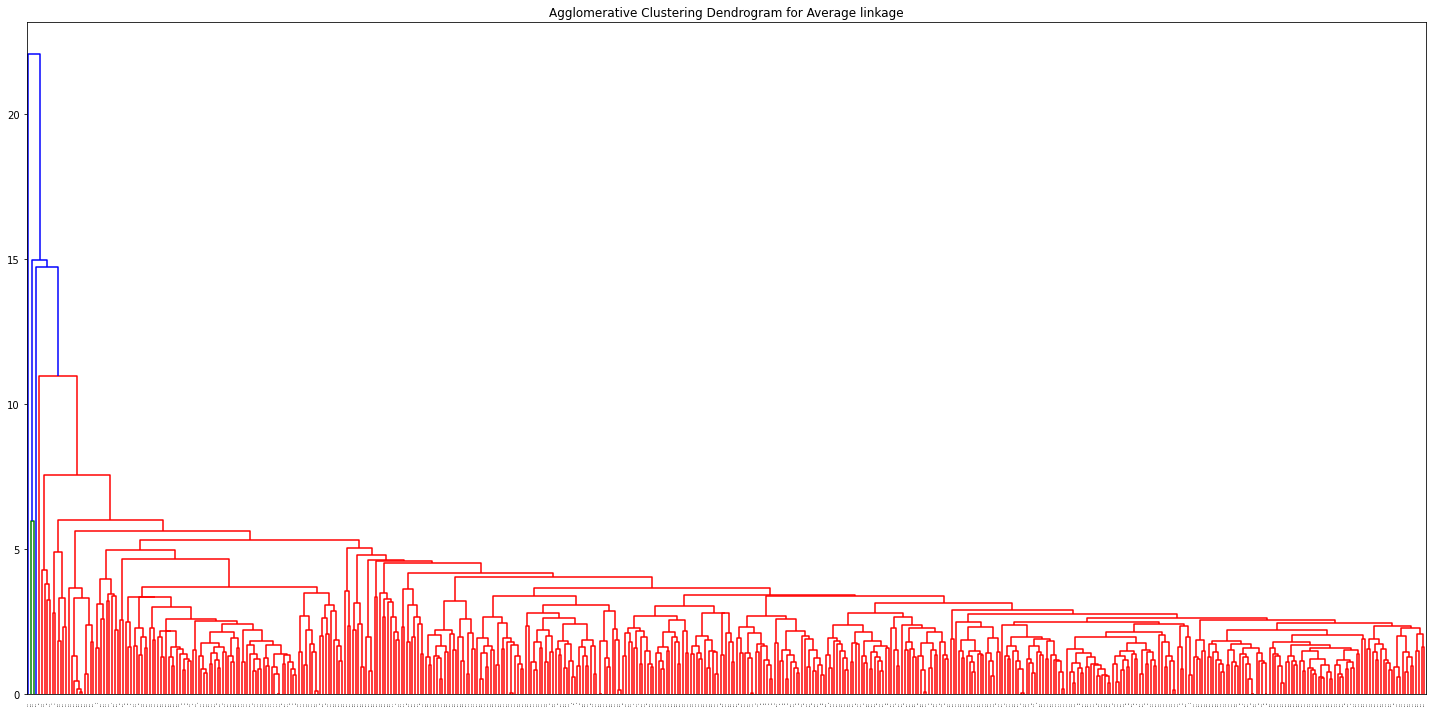

In [30]:
l_avg = linkage(df_scaled,'average')
plt.figure(figsize=(20,10))
plt.title('Agglomerative Clustering Dendrogram for Average linkage')
dendrogram(l_avg,leaf_rotation=90.,color_threshold = 12, leaf_font_size=2)
plt.tight_layout()

### Ward

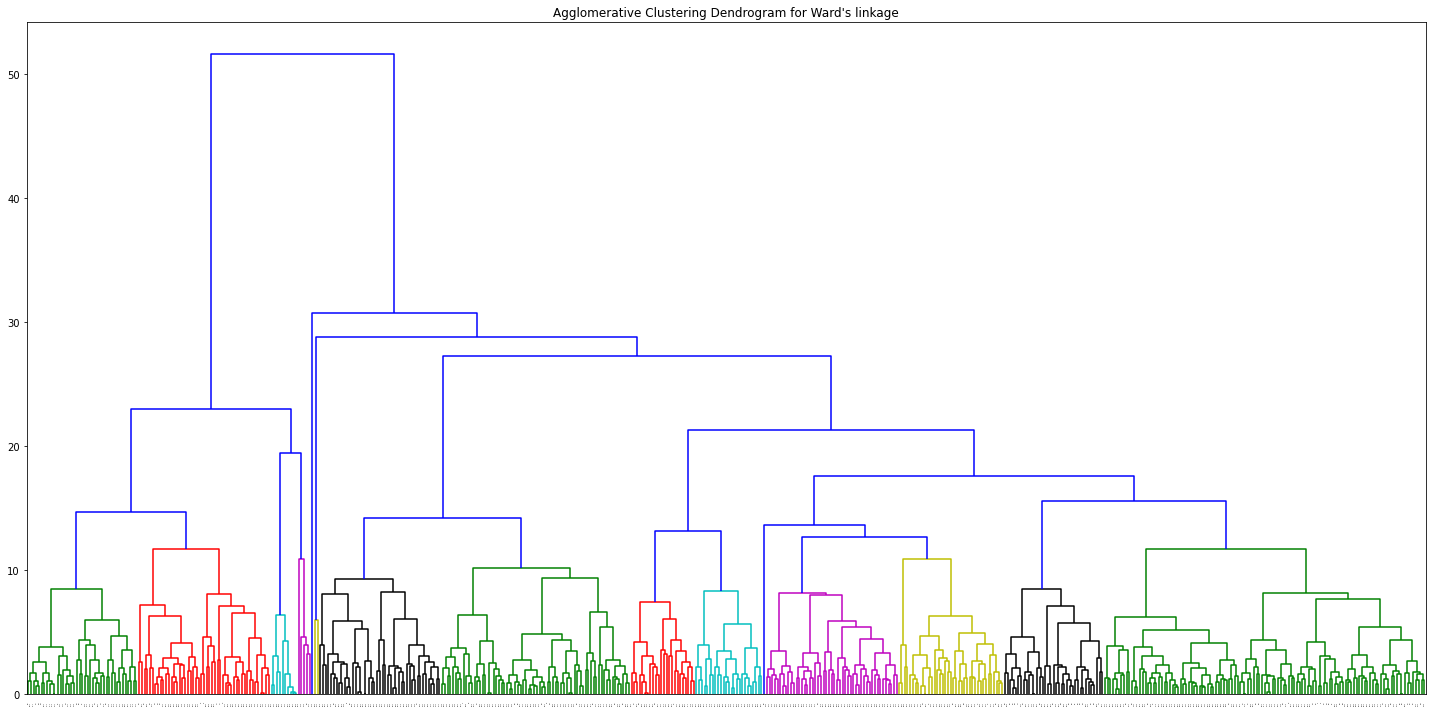

In [31]:
l_ward = linkage(df_scaled,'ward')
plt.figure(figsize=(20,10))
plt.title("Agglomerative Clustering Dendrogram for Ward's linkage")
dendrogram(l_ward,leaf_rotation=90.,color_threshold = 12, leaf_font_size=2)
plt.tight_layout()

### Centroid

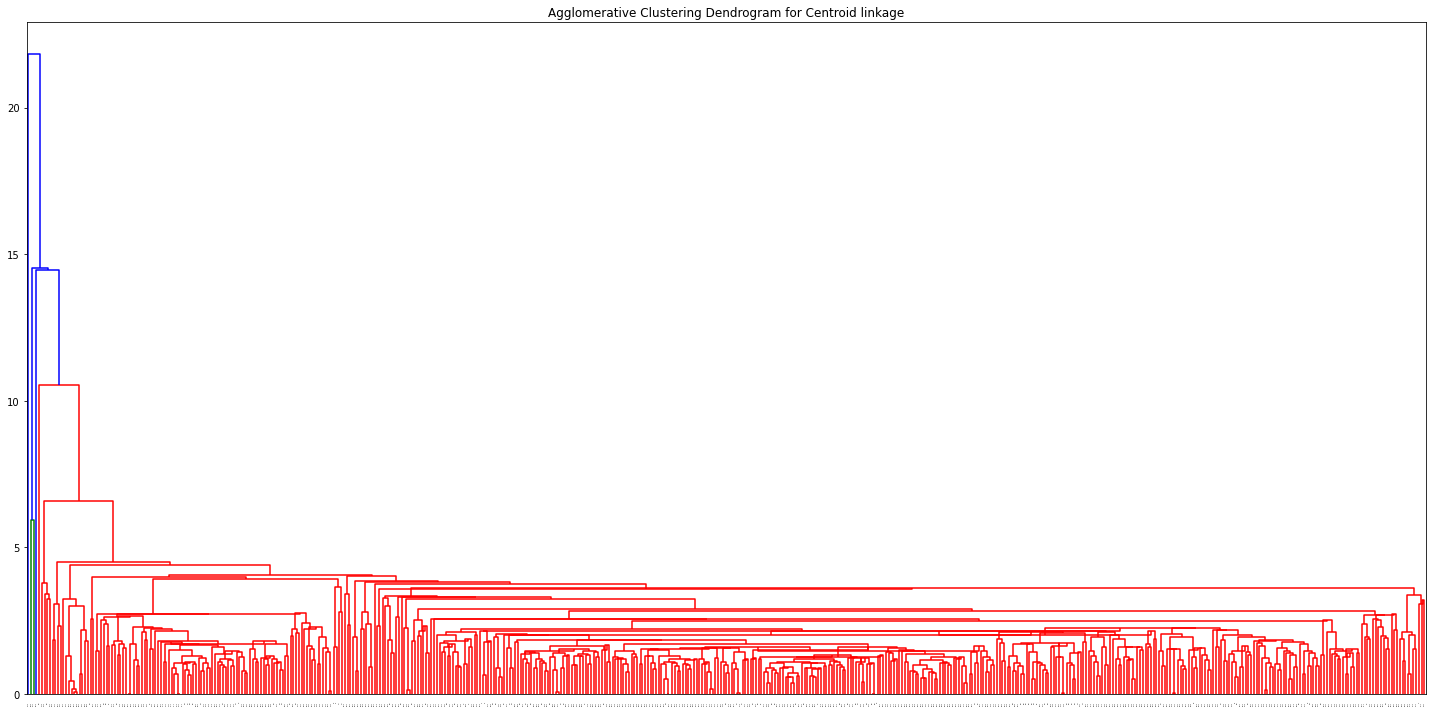

In [32]:
l_cen = linkage(df_scaled,'centroid')
plt.figure(figsize=(20,10))
plt.title('Agglomerative Clustering Dendrogram for Centroid linkage')
dendrogram(l_cen,leaf_rotation=90.,color_threshold = 12, leaf_font_size=2)
plt.tight_layout()

### g. Calculate Cophenet Coorelation coefficient for the above five methods. (4 marks)

In [33]:
print("Cophenetic coefficient of correlation")

c_single , coph_dist = cophenet(l_single,pdist(df_scaled))
print("Single Linkage =",c_single)

c_comp , coph_dist = cophenet(l_comp,pdist(df_scaled))
print("Complete Linkage =",c_comp)

c_avg , coph_dist = cophenet(l_avg,pdist(df_scaled))
print("Average Linkage =",c_avg)

c_ward , coph_dist = cophenet(l_ward,pdist(df_scaled))
print("Ward's Linkage =",c_ward)

c_cent , coph_dist = cophenet(l_cen,pdist(df_scaled))
print("Centroid Linkage =",c_cent)

Cophenetic coefficient of correlation
Single Linkage = 0.854591654994345
Complete Linkage = 0.802948520905804
Average Linkage = 0.9130134898604785
Ward's Linkage = 0.4766781285005207
Centroid Linkage = 0.9047435200805628


### h. Plot the best method labels using the scatter plot. (3 marks)

In [34]:
df_avg.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,labels
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,0


In [35]:
np.unique(a_label)

array([0, 1, 2, 3, 4], dtype=int64)

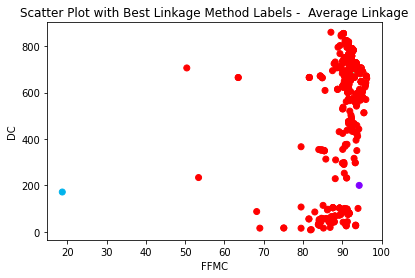

In [43]:
# Plot the scatter plot with the best method labels
plt.scatter(df_avg['FFMC'], df_avg['DC'], c= a_label, cmap='rainbow_r')
plt.xlabel('FFMC')
plt.ylabel('DC')
plt.title('Scatter Plot with Best Linkage Method Labels -  Average Linkage')
plt.show()